In [6]:
# Import required libraries
import pandas as pd
import sqlite3
import os

# Load transformed data
full_data = pd.read_csv('transformed/transformed_full.csv')
incremental_data = pd.read_csv('transformed/transformed_incremental.csv')

# Convert date columns after CSV load
full_data['order_date'] = pd.to_datetime(full_data['order_date'])
incremental_data['order_date'] = pd.to_datetime(incremental_data['order_date'])

# Function to load to SQLite with additional features
def load_to_sqlite():
    # Create database
    conn = sqlite3.connect('loaded/sales_data.db')

    # Load full data
    full_data.to_sql('full_orders', conn, if_exists='replace', index=False)

    # Load incremental data
    incremental_data.to_sql('incremental_orders', conn, if_exists='replace', index=False)

    # Create a merged view
    cursor = conn.cursor()
    cursor.execute("""
    CREATE VIEW IF NOT EXISTS combined_orders AS
    SELECT * FROM full_orders
    UNION ALL
    SELECT * FROM incremental_orders
    """)

    # Create some useful analytical views
    cursor.execute("""
    CREATE VIEW IF NOT EXISTS sales_by_product AS
    SELECT
        product,
        product_category,
        COUNT(*) as order_count,
        SUM(quantity) as total_quantity,
        SUM(total_price) as total_revenue,
        AVG(unit_price) as avg_price
    FROM combined_orders
    GROUP BY product, product_category
    ORDER BY total_revenue DESC
    """)

    cursor.execute("""
    CREATE VIEW IF NOT EXISTS sales_by_region AS
    SELECT
        region,
        COUNT(*) as order_count,
        SUM(total_price) as total_revenue
    FROM combined_orders
    GROUP BY region
    ORDER BY total_revenue DESC
    """)

    # Verify data
    print("Database schema:")
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' OR type='view';")
    print(cursor.fetchall())

    print("\nSample from combined_orders:")
    display(pd.read_sql("SELECT * FROM combined_orders LIMIT 5", conn))

    print("\nSales by product:")
    display(pd.read_sql("SELECT * FROM sales_by_product", conn))

    conn.close()
    print("\nData successfully loaded to SQLite database with analytical views")

# Function to load to Parquet with partitioning
def load_to_parquet():
    # Save with partitioning by product category
    full_data.to_parquet(
        'loaded/full_data.parquet',
        partition_cols=['product_category'],
        index=False
    )

    incremental_data.to_parquet(
        'loaded/incremental_data.parquet',
        partition_cols=['product_category'],
        index=False
    )

    # Verify
    print("\nFull data sample:")
    display(pd.read_parquet('loaded/full_data.parquet').head())

    print("\nDirectory structure:")
    !tree -h loaded/

# Let user choose format
print("Choose loading format:")
print("1. SQLite (recommended for this dataset)")
print("2. Parquet")
choice = input("Enter your choice (1 or 2): ")

if choice == '1':
    load_to_sqlite()
elif choice == '2':
    load_to_parquet()
else:
    print("Invalid choice. Please run again and select 1 or 2.")

Choose loading format:
1. SQLite (recommended for this dataset)
2. Parquet
Enter your choice (1 or 2): 2

Full data sample:


,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,order_month,has_missing_data,product_category
0,7,Charlie,Monitor,2,750.0,2024-02-02,West,1500.0,2024-02,False,Accessories
1,9,Charlie,Monitor,2,750.0,2024-03-16,West,1500.0,2024-03,False,Accessories
2,10,Eve,Monitor,1,500.0,2024-02-28,North,500.0,2024-02,False,Accessories
3,11,Unknown,Monitor,3,750.0,2024-04-24,West,2250.0,2024-04,False,Accessories
4,16,Diana,Monitor,3,750.0,2024-04-29,East,2250.0,2024-04,False,Accessories



Directory structure:
/bin/bash: line 1: tree: command not found


from matplotlib import pyplot as plt
_df_0['order_id'].plot(kind='hist', bins=20, title='order_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_price'].plot(kind='hist', bins=20, title='total_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('customer_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('order_month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='order_id', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='quantity', y='unit_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='unit_price', y='total_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('order_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('order_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('region')):
  _plot_series(series, series_name, i)
  fig.legend(title='region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('order_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('order_month')):
  _plot_series(series, series_name, i)
  fig.legend(title='order_month', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('order_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
_df_14['order_id'].plot(kind='line', figsize=(8, 4), title='order_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['unit_price'].plot(kind='line', figsize=(8, 4), title='unit_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['total_price'].plot(kind='line', figsize=(8, 4), title='total_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in _df_18.groupby('customer_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customer_name')
_ = plt.ylabel('region')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['order_month'].value_counts()
    for x_label, grp in _df_19.groupby('region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('region')
_ = plt.ylabel('order_month')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['customer_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='order_id', y='customer_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='order_id', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['order_month'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='order_id', y='order_month', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['customer_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='quantity', y='customer_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

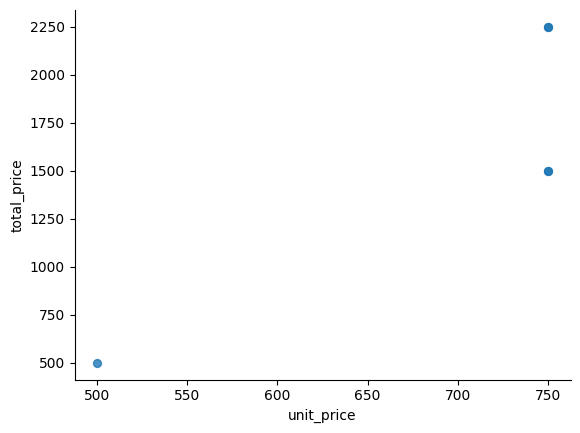

In [7]:
from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='unit_price', y='total_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

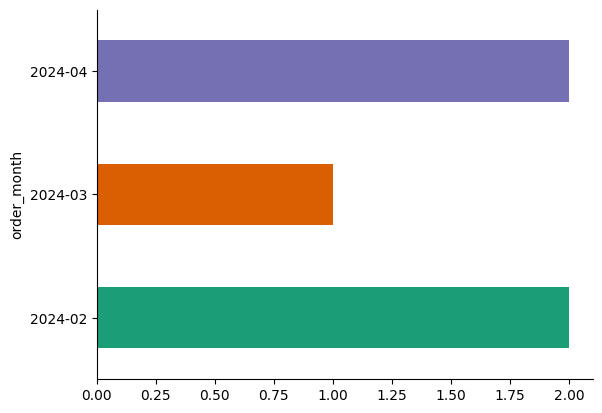

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('order_month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

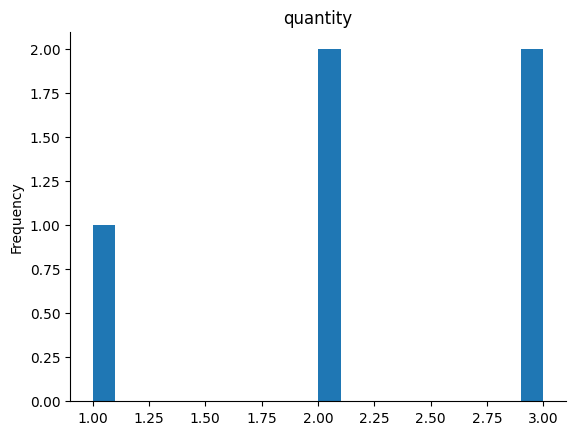

In [9]:
from matplotlib import pyplot as plt
_df_1['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
import shutil
import os
from google.colab import files

# Compress the 'loaded' folder
output_filename = 'loaded_files'
shutil.make_archive(output_filename, 'zip', 'loaded')

# Download the zip file
files.download(f'{output_filename}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>